In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from http://www.ebi.ac.uk/Tools/webservices/psicquic/mint/webservices/current/search/query/species:yeast

# yeast_intra = pd.read_csv('data/species_yeast.txt', sep='\t', header=None);
# yeast_intra

## Load PFAM domains for yeast

In [3]:
import re

# http://pfam.xfam.org/proteome/559292#tabview=tab2
# load in header row as single string # names are between angle brackets
yeast_pfam_header = re.findall(r'<(.*?)>', pd.read_csv('data/pfam_yeast_domains.tsv', sep='\n', header=2).columns[0]);

yeast_pfam_header

['seq id',
 'alignment start',
 'alignment end',
 'envelope start',
 'envelope end',
 'hmm acc',
 'hmm name',
 'type',
 'hmm start',
 'hmm end',
 'hmm length',
 'bit score',
 'E-value',
 'clan']

In [4]:
yeast_pfam = pd.read_csv('data/pfam_yeast_domains.tsv', sep='\t', names=yeast_pfam_header);

In [5]:
yeast_pfam.head()

,seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,type,hmm start,hmm end,hmm length,bit score,E-value,clan
0,#Pfam-A regions from Pfam version 33.1 for ncb...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#Total number of proteins in proteome: 6048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#<seq id> <alignment start> <alignment end> <e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A0A0B7P3V8,621.0,721.0,620.0,724.0,PF00665,rve,Domain,2.0,99.0,102.0,52.0,1.800000e-10,CL0219
4,A2P2R3,79.0,204.0,54.0,215.0,PF13522,GATase_6,Domain,10.0,121.0,132.0,54.7,3.000000e-11,CL0052


In [6]:
yeast_pfam = yeast_pfam.drop(range(3)).reset_index(drop=True)
yeast_pfam.head(20)

,seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,type,hmm start,hmm end,hmm length,bit score,E-value,clan
0,A0A0B7P3V8,621.0,721.0,620.0,724.0,PF00665,rve,Domain,2.0,99.0,102.0,52.0,1.800000e-10,CL0219
1,A2P2R3,79.0,204.0,54.0,215.0,PF13522,GATase_6,Domain,10.0,121.0,132.0,54.7,3.000000e-11,CL0052
2,D6VPM8,24.0,117.0,14.0,120.0,PF00674,DUP,Family,9.0,100.0,103.0,115.8,2.200000e-30,No_clan
3,D6VTK4,17.0,296.0,17.0,297.0,PF02116,STE2,Family,1.0,279.0,280.0,304.9,1.300000e-87,No_clan
4,D6W196,231.0,335.0,225.0,337.0,PF00153,Mito_carr,Family,9.0,95.0,97.0,64.3,2.000000e-14,No_clan
5,D6W196,345.0,402.0,343.0,436.0,PF00153,Mito_carr,Family,3.0,60.0,97.0,32.7,1.400000e-04,No_clan
6,D6W196,89.0,107.0,87.0,110.0,PF13202,EF-hand_5,Domain,5.0,23.0,25.0,17.4,5.700000e+00,CL0220
7,D6W196,17.0,78.0,13.0,79.0,PF13499,EF-hand_7,Domain,5.0,69.0,70.0,35.0,3.700000e-05,CL0220
8,O13297,279.0,497.0,278.0,497.0,PF02940,mRNA_triPase,Domain,2.0,221.0,221.0,253.8,3.500000e-72,CL0273
9,O13516,107.0,150.0,107.0,153.0,PF01479,S4,Domain,1.0,44.0,48.0,45.8,9.500000e-09,CL0492


In [7]:
yeast_pfam.shape

(7907, 14)

In [8]:
yeast_pfam['seq id'].unique().size

4930

In [9]:
yeast_pfam['type'].unique()

array(['Domain', 'Family', 'Coiled-coil', 'Repeat', 'Motif', 'Disordered'],
      dtype=object)

We are choosing to drop all types that are not explicitly domains

In [10]:
# yeast_pfam_domains = yeast_pfam[yeast_pfam['type'] == 'Domain'].sort_values('seq id')
yeast_pfam_domains = yeast_pfam
yeast_pfam_domains

,seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,type,hmm start,hmm end,hmm length,bit score,E-value,clan
0,A0A0B7P3V8,621.0,721.0,620.0,724.0,PF00665,rve,Domain,2.0,99.0,102.0,52.0,1.800000e-10,CL0219
1,A2P2R3,79.0,204.0,54.0,215.0,PF13522,GATase_6,Domain,10.0,121.0,132.0,54.7,3.000000e-11,CL0052
2,D6VPM8,24.0,117.0,14.0,120.0,PF00674,DUP,Family,9.0,100.0,103.0,115.8,2.200000e-30,No_clan
3,D6VTK4,17.0,296.0,17.0,297.0,PF02116,STE2,Family,1.0,279.0,280.0,304.9,1.300000e-87,No_clan
4,D6W196,231.0,335.0,225.0,337.0,PF00153,Mito_carr,Family,9.0,95.0,97.0,64.3,2.000000e-14,No_clan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,Q9ZZW7,269.0,367.0,268.0,369.0,PF00961,LAGLIDADG_1,Domain,2.0,100.0,102.0,77.7,2.800000e-18,CL0324
7903,Q9ZZW7,405.0,499.0,405.0,501.0,PF00961,LAGLIDADG_1,Domain,1.0,100.0,102.0,40.8,8.900000e-07,CL0324
7904,Q9ZZX0,201.0,296.0,201.0,300.0,PF00961,LAGLIDADG_1,Domain,1.0,98.0,102.0,50.5,8.400000e-10,CL0324
7905,Q9ZZX1,13.0,326.0,13.0,336.0,PF00115,COX1,Family,1.0,292.0,432.0,316.6,6.600000e-91,No_clan


In [11]:
yeast_pfam_domains.reset_index(drop=True, inplace=True)
yeast_pfam_domains

,seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,type,hmm start,hmm end,hmm length,bit score,E-value,clan
0,A0A0B7P3V8,621.0,721.0,620.0,724.0,PF00665,rve,Domain,2.0,99.0,102.0,52.0,1.800000e-10,CL0219
1,A2P2R3,79.0,204.0,54.0,215.0,PF13522,GATase_6,Domain,10.0,121.0,132.0,54.7,3.000000e-11,CL0052
2,D6VPM8,24.0,117.0,14.0,120.0,PF00674,DUP,Family,9.0,100.0,103.0,115.8,2.200000e-30,No_clan
3,D6VTK4,17.0,296.0,17.0,297.0,PF02116,STE2,Family,1.0,279.0,280.0,304.9,1.300000e-87,No_clan
4,D6W196,231.0,335.0,225.0,337.0,PF00153,Mito_carr,Family,9.0,95.0,97.0,64.3,2.000000e-14,No_clan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,Q9ZZW7,269.0,367.0,268.0,369.0,PF00961,LAGLIDADG_1,Domain,2.0,100.0,102.0,77.7,2.800000e-18,CL0324
7903,Q9ZZW7,405.0,499.0,405.0,501.0,PF00961,LAGLIDADG_1,Domain,1.0,100.0,102.0,40.8,8.900000e-07,CL0324
7904,Q9ZZX0,201.0,296.0,201.0,300.0,PF00961,LAGLIDADG_1,Domain,1.0,98.0,102.0,50.5,8.400000e-10,CL0324
7905,Q9ZZX1,13.0,326.0,13.0,336.0,PF00115,COX1,Family,1.0,292.0,432.0,316.6,6.600000e-91,No_clan


### Create map of sequence IDs and their indices

In [12]:
yeast_pfam_domains['seq id'].unique().size

4930

In [13]:
# Make unique uniprot IDs as index
yeast_pfam_indices = pd.Series(index=yeast_pfam_domains['seq id'].unique(), dtype=object)
yeast_pfam_indices

A0A0B7P3V8    NaN
A2P2R3        NaN
D6VPM8        NaN
D6VTK4        NaN
D6W196        NaN
             ... 
Q9P305        NaN
Q9URQ3        NaN
Q9ZZW7        NaN
Q9ZZX0        NaN
Q9ZZX1        NaN
Length: 4930, dtype: object

In [14]:
# Verify type of indices
print(type(yeast_pfam_indices.index[0]))

<class 'str'>


Find all locations in PFAM dataframe where index occurs and add it to map

In [15]:
for idx in yeast_pfam_indices.index:
    yeast_pfam_indices.loc[idx] = yeast_pfam_domains['seq id'][yeast_pfam_domains['seq id'] == idx].index

In [16]:
yeast_pfam_indices

A0A0B7P3V8                   Int64Index([0], dtype='int64')
A2P2R3                       Int64Index([1], dtype='int64')
D6VPM8                       Int64Index([2], dtype='int64')
D6VTK4                       Int64Index([3], dtype='int64')
D6W196              Int64Index([4, 5, 6, 7], dtype='int64')
                                  ...                      
Q9P305                    Int64Index([7899], dtype='int64')
Q9URQ3                    Int64Index([7900], dtype='int64')
Q9ZZW7        Int64Index([7901, 7902, 7903], dtype='int64')
Q9ZZX0                    Int64Index([7904], dtype='int64')
Q9ZZX1              Int64Index([7905, 7906], dtype='int64')
Length: 4930, dtype: object

Confirm that the map works

In [17]:
yeast_pfam_domains.loc[yeast_pfam_indices.iloc[0]]

,seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,type,hmm start,hmm end,hmm length,bit score,E-value,clan
0,A0A0B7P3V8,621.0,721.0,620.0,724.0,PF00665,rve,Domain,2.0,99.0,102.0,52.0,1.800000e-10,CL0219


In [18]:
# http://pfam.xfam.org/protein/TUP1_YEAST
'P16649' in yeast_pfam_domains['seq id'].to_list()

True

In [19]:
yeast_pfam_domains.loc[yeast_pfam_indices['P16649']]

,seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,type,hmm start,hmm end,hmm length,bit score,E-value,clan
1062,P16649,476.0,513.0,475.0,513.0,PF00400,WD40,Repeat,2.0,38.0,38.0,35.7,2.700000e-05,CL0186
1063,P16649,442.0,471.0,432.0,471.0,PF00400,WD40,Repeat,12.0,38.0,38.0,31.0,7.700000e-04,CL0186
1064,P16649,572.0,604.0,568.0,604.0,PF00400,WD40,Repeat,7.0,38.0,38.0,27.3,1.200000e-02,CL0186
1065,P16649,621.0,658.0,620.0,658.0,PF00400,WD40,Repeat,2.0,38.0,38.0,22.6,3.700000e-01,CL0186
1066,P16649,518.0,555.0,517.0,555.0,PF00400,WD40,Repeat,2.0,38.0,38.0,19.0,5.100000e+00,CL0186
1067,P16649,662.0,706.0,662.0,706.0,PF00400,WD40,Repeat,1.0,38.0,38.0,17.3,1.700000e+01,CL0186
1068,P16649,342.0,367.0,336.0,371.0,PF00400,WD40,Repeat,9.0,34.0,38.0,17.2,1.800000e+01,CL0186
1069,P16649,11.0,88.0,11.0,88.0,PF08581,Tup_N,Domain,1.0,77.0,77.0,98.6,4.800000e-25,No_clan


In [20]:
# http://pfam.xfam.org/protein/CDC4_YEAST
yeast_pfam_domains.loc[yeast_pfam_domains['seq id']=='P07834']

,seq id,alignment start,alignment end,envelope start,envelope end,hmm acc,hmm name,type,hmm start,hmm end,hmm length,bit score,E-value,clan
448,P07834,415.0,449.0,412.0,449.0,PF00400,WD40,Repeat,4.0,38.0,38.0,26.6,2.000000e-02,CL0186
449,P07834,453.0,493.0,453.0,493.0,PF00400,WD40,Repeat,1.0,38.0,38.0,26.2,2.600000e-02,CL0186
450,P07834,375.0,408.0,371.0,408.0,PF00400,WD40,Repeat,5.0,38.0,38.0,22.6,3.700000e-01,CL0186
451,P07834,561.0,598.0,560.0,598.0,PF00400,WD40,Repeat,2.0,38.0,38.0,22.5,4.000000e-01,CL0186
452,P07834,523.0,556.0,521.0,556.0,PF00400,WD40,Repeat,4.0,38.0,38.0,21.9,6.100000e-01,CL0186
453,P07834,275.0,312.0,273.0,320.0,PF00646,F-box,Domain,3.0,40.0,48.0,20.9,6.200000e-01,CL0271
454,P07834,227.0,272.0,224.0,272.0,PF16856,CDC4_D,Domain,6.0,51.0,51.0,65.5,7.400000e-15,No_clan


In [21]:
'PF00400' in yeast_pfam_domains['hmm acc'].to_list()

True

For some reason WD40 isn't in the downloaded data
EDIT: This is because we dropped all non-domains from the pfam database

In [22]:
# http://pfam.xfam.org/protein/MSI1_YEAST
'P13712' in yeast_pfam_domains['seq id'].to_list()

True

In [23]:
'PF12265' in yeast_pfam_domains['hmm acc']

False

Nor are some proteins

## Load BioGRID Interactome for yeast

In [24]:
# downloaded from https://downloads.thebiogrid.org/File/BioGRID/Release-Archive/BIOGRID-4.2.191/BIOGRID-ORGANISM-4.2.191.tab3.zip

yeast_df = pd.read_csv("data/BIOGRID-ORGANISM-Saccharomyces_cerevisiae_S288c-4.2.191.tab3.txt",
                        sep = "\t")

C:\Users\mawil\Anaconda3\envs\SYSC4907\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [25]:
yeast_df.shape

(756225, 37)

In [26]:
yeast_df.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
0,68770,851136,854020,31676,34272,YLR418C,YOL145C,CDC73,CTR9,L000002792,...,-,NP_014496,-,-,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c)
1,68771,854020,851136,34272,31676,YOL145C,YLR418C,CTR9,CDC73,CDP1|L000003477,...,-,NP_013522,-,-,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c)
2,68774,851136,854290,31676,34518,YLR418C,YOR123C,CDC73,LEO1,L000002792,...,-,NP_014766,-,-,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c)
3,68775,854290,851136,34518,31676,YOR123C,YLR418C,LEO1,CDC73,L000000936,...,-,NP_013522,-,-,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c)
4,68778,851136,852582,31676,32973,YLR418C,YBR279W,CDC73,PAF1,L000002792,...,-,NP_009838,-,-,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c)


In [27]:
yeast_df.columns

Index(['#BioGRID Interaction ID', 'Entrez Gene Interactor A',
       'Entrez Gene Interactor B', 'BioGRID ID Interactor A',
       'BioGRID ID Interactor B', 'Systematic Name Interactor A',
       'Systematic Name Interactor B', 'Official Symbol Interactor A',
       'Official Symbol Interactor B', 'Synonyms Interactor A',
       'Synonyms Interactor B', 'Experimental System',
       'Experimental System Type', 'Author', 'Publication Source',
       'Organism ID Interactor A', 'Organism ID Interactor B', 'Throughput',
       'Score', 'Modification', 'Qualifications', 'Tags', 'Source Database',
       'SWISS-PROT Accessions Interactor A', 'TREMBL Accessions Interactor A',
       'REFSEQ Accessions Interactor A', 'SWISS-PROT Accessions Interactor B',
       'TREMBL Accessions Interactor B', 'REFSEQ Accessions Interactor B',
       'Ontology Term IDs', 'Ontology Term Names', 'Ontology Term Categories',
       'Ontology Term Qualifier IDs', 'Ontology Term Qualifier Names',
       'Ontology

In [28]:
yeast_df.iloc[0]

#BioGRID Interaction ID                                          68770
Entrez Gene Interactor A                                        851136
Entrez Gene Interactor B                                        854020
BioGRID ID Interactor A                                          31676
BioGRID ID Interactor B                                          34272
Systematic Name Interactor A                                   YLR418C
Systematic Name Interactor B                                   YOL145C
Official Symbol Interactor A                                     CDC73
Official Symbol Interactor B                                      CTR9
Synonyms Interactor A                                       L000002792
Synonyms Interactor B                                  CDP1|L000003477
Experimental System                                Affinity Capture-MS
Experimental System Type                                      physical
Author                                                Krogan NJ (2004)
Public

Many of the same sequences appear in a line as '|'

In [29]:
yeast_df['SWISS-PROT Accessions Interactor A'] = yeast_df['SWISS-PROT Accessions Interactor A'].apply(lambda s: s.split('|'))
yeast_df['SWISS-PROT Accessions Interactor B'] = yeast_df['SWISS-PROT Accessions Interactor B'].apply(lambda s: s.split('|'))
yeast_df = yeast_df.explode('SWISS-PROT Accessions Interactor A', ignore_index=True).explode('SWISS-PROT Accessions Interactor B', ignore_index=True)

In [30]:
yeast_df.shape

(769110, 37)

Drop all for where swiss-prot ID is not available

In [31]:
yeast_df.drop(yeast_df[yeast_df['SWISS-PROT Accessions Interactor A'] == '-'].index, inplace=True)
yeast_df.drop(yeast_df[yeast_df['SWISS-PROT Accessions Interactor B'] == '-'].index, inplace=True)
yeast_df.shape

(766596, 37)

## Load domain-domain interactinos

In [32]:
# from https://3did.irbbarcelona.org/download.php
yeast_3DID = pd.read_csv("data/3did_flat_Apr_10_2020.dat",
                        sep = "\t", header = None,
                        names=range(7))

In [33]:
yeast_3DID.head()

,0,1,2,3,4,5,6
0,#=ID,1-cysPrx_C,1-cysPrx_C,(PF10417.9@Pfam,PF10417.9@Pfam),NaN,NaN
1,#=3D,5jcg,A:157-192,H:157-192,1.1,1.50646,2:2
2,Q,E,159,162,sm,NaN,NaN
3,Q,T,159,163,sm,NaN,NaN
4,E,Q,162,159,ms,NaN,NaN


In [34]:
# this is a flat database; find indices with #=ID, that's what we're interested in (domain domain pairs)
id_indices_3did = yeast_3DID[0].loc[yeast_3DID[0] == '#=ID'].index
id_indices_3did

Int64Index([       0,      489,    17346,    17505,    17551,    17560,
               24675,    24777,    25600,    25610,
            ...
            21980373, 21981657, 21981733, 21981833, 21981862, 21982157,
            21982178, 21983337, 21983498, 21983742],
           dtype='int64', length=14278)

In [35]:
# strip all that are not those indices in non-pfam columns
yeast_3DID_pfam = yeast_3DID[[3,4]].iloc[id_indices_3did]
yeast_3DID_pfam

,3,4
0,(PF10417.9@Pfam,PF10417.9@Pfam)
489,(PF10417.9@Pfam,PF00578.21@Pfam)
17346,(PF10417.9@Pfam,PF02195.18@Pfam)
17505,(PF10417.9@Pfam,PF00085.20@Pfam)
17551,(PF12574.8@Pfam,PF12574.8@Pfam)
...,...,...
21982157,(PF05707.12@Pfam,PF05707.12@Pfam)
21982178,(PF16916.5@Pfam,PF16916.5@Pfam)
21983337,(PF00791.20@Pfam,PF00791.20@Pfam)
21983498,(PF09817.9@Pfam,PF09817.9@Pfam)


In [36]:
# Reformat so it's just pfam IDs
yeast_3DID_pfam.columns=["Pfam ID A","Pfam ID B"]
yeast_3DID_pfam.reset_index(inplace=True, drop=True)

import re
# yeast_3DID_pfam['Pfam ID A'] = yeast_3DID_pfam['Pfam ID A'].apply(lambda x: x.strip('@Pfam'))
# yeast_3DID_pfam['Pfam ID A'] = yeast_3DID_pfam['Pfam ID A'].apply(lambda x: x.strip('('))
yeast_3DID_pfam['Pfam ID A'] = yeast_3DID_pfam['Pfam ID A'].apply(lambda x: re.findall(r'\((.+?)\.', x)[0])
yeast_3DID_pfam['Pfam ID B'] = yeast_3DID_pfam['Pfam ID B'].apply(lambda x: re.findall(r'.*(?=\.)', x)[0])

yeast_3DID_pfam.head()

,Pfam ID A,Pfam ID B
0,PF10417,PF10417
1,PF10417,PF00578
2,PF10417,PF02195
3,PF10417,PF00085
4,PF12574,PF12574


In [37]:
yeast_3DID_pfam

,Pfam ID A,Pfam ID B
0,PF10417,PF10417
1,PF10417,PF00578
2,PF10417,PF02195
3,PF10417,PF00085
4,PF12574,PF12574
...,...,...
14273,PF05707,PF05707
14274,PF16916,PF16916
14275,PF00791,PF00791
14276,PF09817,PF09817


In [38]:
yeast_3DID_pfam['Pfam ID A'].unique().size

7173

In [39]:
yeast_3DID_pfam['Pfam ID B'].unique().size

7167

In [40]:
yeast_3DID_pfam[yeast_3DID_pfam['Pfam ID A'] == yeast_3DID_pfam['Pfam ID B'].iloc[1]]

,Pfam ID A,Pfam ID B
749,PF00578,PF00578
750,PF00578,PF00881
751,PF00578,PF02195
752,PF00578,PF00085
753,PF00578,PF17991
754,PF00578,PF13905


In [41]:
yeast_3DID_pfam[yeast_3DID_pfam['Pfam ID B'] == yeast_3DID_pfam['Pfam ID B'].iloc[1]]

,Pfam ID A,Pfam ID B
1,PF10417,PF00578
749,PF00578,PF00578


### Create dictionary of domain pairs

In [42]:
pfam_pairs = pd.DataFrame(index=pd.concat([yeast_3DID_pfam['Pfam ID A'], yeast_3DID_pfam['Pfam ID B']]).unique(), columns=['pair values'])

In [43]:
pfam_pairs['pair values'] = [[] for _ in range(pfam_pairs.shape[0])]

In [44]:
pfam_pairs

,pair values
PF10417,[]
PF12574,[]
PF00244,[]
PF00389,[]
PF02826,[]
...,...
PF13894,[]
PF18366,[]
PF14835,[]
PF18586,[]


In [45]:

for A, B in zip(yeast_3DID_pfam['Pfam ID A'], yeast_3DID_pfam['Pfam ID B']):
    if B not in pfam_pairs['pair values'].loc[A]:
        pfam_pairs['pair values'].loc[A].append(B)

In [46]:
pfam_pairs

,pair values
PF10417,"[PF10417, PF00578, PF02195, PF00085]"
PF12574,[PF12574]
PF00244,"[PF00244, PF00583, PF03496, PF00130, PF00525, ..."
PF00389,"[PF00389, PF01842, PF11890]"
PF02826,"[PF02826, PF02222, PF17769]"
...,...
PF13894,[]
PF18366,[]
PF14835,[]
PF18586,[]


In [47]:
for A, B in zip(yeast_3DID_pfam['Pfam ID A'], yeast_3DID_pfam['Pfam ID B']):
    if A not in pfam_pairs['pair values'].loc[B]:
        pfam_pairs['pair values'].loc[B].append(A)

In [48]:
pfam_pairs

,pair values
PF10417,"[PF10417, PF00578, PF02195, PF00085]"
PF12574,[PF12574]
PF00244,"[PF00244, PF00583, PF03496, PF00130, PF00525, ..."
PF00389,"[PF00389, PF01842, PF11890]"
PF02826,"[PF02826, PF02222, PF17769]"
...,...
PF13894,[PF00096]
PF18366,[PF00096]
PF14835,[PF00097]
PF18586,[PF18585]


In [49]:
yeast_3DID_pfam[yeast_3DID_pfam['Pfam ID B'] == 'PF17979']

,Pfam ID A,Pfam ID B
14231,PF10283,PF17979


In [50]:
pfam_pairs.loc['PF10283']

pair values    [PF17979]
Name: PF10283, dtype: object

## Find indices of sites for pairs

Create columns in yeast dataframe for domain pairs

In [51]:
yeast_df['domain_a'] = [[] for _ in range(yeast_df.shape[0])]
yeast_df['domain_b'] = [[] for _ in range(yeast_df.shape[0])]
yeast_df['domain_seq_a'] = [[] for _ in range(yeast_df.shape[0])]
yeast_df['domain_seq_b'] = [[] for _ in range(yeast_df.shape[0])]

In [52]:
yeast_pfam_domains['envelope start'] = yeast_pfam_domains['envelope start'].round(0).astype(np.int)
yeast_pfam_domains['envelope end'] = yeast_pfam_domains['envelope end'].round(0).astype(np.int)
yeast_pfam_domains['envelope start'], yeast_pfam_domains['envelope end']

(0       620
 1        54
 2        14
 3        17
 4       225
        ... 
 7902    268
 7903    405
 7904    201
 7905     13
 7906    424
 Name: envelope start, Length: 7907, dtype: int32,
 0       724
 1       215
 2       120
 3       297
 4       337
        ... 
 7902    369
 7903    501
 7904    300
 7905    336
 7906    601
 Name: envelope end, Length: 7907, dtype: int32)

In [53]:
total_domains_found = 0
total_found = 0

for PA, PB, DA, DB, DSA, DSB in zip(yeast_df['SWISS-PROT Accessions Interactor A'], yeast_df['SWISS-PROT Accessions Interactor B'], yeast_df['domain_a'], yeast_df['domain_b'], yeast_df['domain_seq_a'], yeast_df['domain_seq_b']):
    found = False

    try:
        # Find locations in PFAM with relevant protein sequences
        pfam_indices_A = yeast_pfam_indices.loc[PA] 
        pfam_indices_B = yeast_pfam_indices.loc[PB]
        # Get iterable of PFAM IDs for domains for each protein
        # print(pfam_indices_A[0])
        pfam_ids_A = yeast_pfam_domains['hmm acc'].loc[pfam_indices_A]
        pfam_ids_B = yeast_pfam_domains['hmm acc'].loc[pfam_indices_B]
    except KeyError as inst:
#         print("No pfam entry found for protein")
#         print(inst.args)
        continue
    
    # for each domain PFAM id in A
    for pfam_index_A, pfam_id_A in pfam_ids_A.iteritems():
        # for each domain PFAM id in B
        for pfam_index_B, pfam_id_B in pfam_ids_B.iteritems():
            try:
                # get list of all domain interactions with B
                pfam_id_B_pairs = pfam_pairs['pair values'].loc[pfam_id_B]
            except KeyError as inst:
#                 print("No pairs found for domain " + inst.args[0])
                continue
            
            # if domain A is in the list of interactions for domain B, we have a match
            if pfam_id_A in pfam_id_B_pairs:

                # save domain starts and ends as tuples
                DA.append(pfam_id_A)
                DB.append(pfam_id_B)
                DSA.append((yeast_pfam_domains['envelope start'].loc[pfam_index_A], yeast_pfam_domains['envelope end'].loc[pfam_index_A]))
                DSB.append((yeast_pfam_domains['envelope start'].loc[pfam_index_B], yeast_pfam_domains['envelope end'].loc[pfam_index_B]))
                
                total_domains_found += 1
                found = True
    if found:
        total_found += 1

total_domains_found, total_found

(94817, 39071)

In [54]:
yeast_df

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B,domain_a,domain_b,domain_seq_a,domain_seq_b
0,68770,851136,854020,31676,34272,YLR418C,YOL145C,CDC73,CTR9,L000002792,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]
1,68771,854020,851136,34272,31676,YOL145C,YLR418C,CTR9,CDC73,CDP1|L000003477,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]
2,68774,851136,854290,31676,34518,YLR418C,YOR123C,CDC73,LEO1,L000002792,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]
3,68775,854290,851136,34518,31676,YOR123C,YLR418C,LEO1,CDC73,L000000936,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]
4,68778,851136,852582,31676,32973,YLR418C,YBR279W,CDC73,PAF1,L000002792,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769105,2874488,854450,855907,34665,35989,YOR276W,YPL194W,CAF20,DDC1,CAF2|CAP20|p20|L000000208|L000003291,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]
769106,2874489,854450,856136,34665,36202,YOR276W,YPR025C,CAF20,CCL1,CAF2|CAP20|p20|L000000208|L000003291,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]
769107,2874490,854450,856158,34665,36221,YOR276W,YPR045C,CAF20,THP3,CAF2|CAP20|p20|L000000208|L000003291,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]
769108,2874491,854450,856184,34665,36243,YOR276W,YPR071W,CAF20,YPR071W,CAF2|CAP20|p20|L000000208|L000003291,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[],[],[],[]


## Generate masks

Filter for ones where we only found a single domain interaction pair

In [55]:
yeast_single_site = yeast_df[yeast_df.domain_a.str.len() == 1].reset_index()
yeast_single_site

,index,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,...,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B,domain_a,domain_b,domain_seq_a,domain_seq_b
0,24,68887,854020,852582,34272,32973,YOL145C,YBR279W,CTR9,PAF1,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[PF13176],[PF03985],"[(735, 768)]","[(6, 419)]"
1,25,68888,852582,854020,32973,34272,YBR279W,YOL145C,PAF1,CTR9,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[PF03985],[PF13176],"[(6, 419)]","[(735, 768)]"
2,38,68910,851318,853509,31837,33803,YDL209C,YJR050W,CWC2,ISY1,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[PF16131],[PF06246],"[(4, 114)]","[(1, 232)]"
3,39,68911,851318,855888,31837,35972,YDL209C,YPL213W,CWC2,LEA1,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[PF00076],[PF14580],"[(149, 206)]","[(47, 181)]"
4,58,68964,855476,856570,35594,36599,YNL245C,YHR165C,CWC25,PRP8,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[PF10197],[PF10596],"[(11, 47)]","[(1514, 1672)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22312,768278,2862966,853463,856746,33763,36759,YJR007W,YER025W,SUI2,GCD11,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[PF07541],[PF03144],"[(126, 237)]","[(335, 418)]"
22313,768282,2862970,853463,852974,33763,33325,YJR007W,YGR083C,SUI2,GCD2,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[PF00575],[PF01008],"[(13, 88)]","[(285, 637)]"
22314,768289,2873366,854026,854450,34278,34665,YOL139C,YOR276W,CDC33,CAF20,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[PF01652],[PF17052],"[(38, 196)]","[(3, 153)]"
22315,768290,2873367,854026,853071,34278,33414,YOL139C,YGR162W,CDC33,TIF4631,...,-,-,-,-,Saccharomyces cerevisiae (S288c),Saccharomyces cerevisiae (S288c),[PF01652],[PF12152],"[(38, 196)]","[(400, 469)]"


In [56]:
# Split out into numpy arrays
Uniprot_id_A = yeast_single_site['SWISS-PROT Accessions Interactor A'].to_numpy()
Uniprot_id_B = yeast_single_site['SWISS-PROT Accessions Interactor B'].to_numpy()
domain_pfam_a = yeast_single_site['domain_a'].to_numpy()
domain_pfam_b = yeast_single_site['domain_b'].to_numpy()
positions_a = yeast_single_site['domain_seq_a'].to_numpy()
positions_b = yeast_single_site['domain_seq_b'].to_numpy()

Load reference proteome for yeast

In [57]:
# reference proteome at https://www.uniprot.org/proteomes/UP000002311
# general proteome (reviewed S. cerevisiae) at https://www.uniprot.org/uniprot/?query=taxonomy:%22Saccharomyces%20cerevisiae%20(strain%20ATCC%20204508%20/%20S288c)%20(Baker%27s%20yeast)%20[559292]%22&fil=organism%3A%22Saccharomyces+cerevisiae+%28strain+ATCC+204508+%2F+S288c%29+%28Baker%27s+yeast%29+%5B559292%5D%22+AND+reviewed%3Ayes
uniprot_df = pd.read_csv("data/uniprot-proteome UP000002311.tab",
                        sep = "\t", index_col='Entry')

In [58]:
uniprot_df.head()

,Entry name,Status,Protein names,Gene names,Organism,Length,Sequence
Entry,,,,,,,
P21192,ACE2_YEAST,reviewed,Metallothionein expression activator,ACE2 YLR131C L3123 L9606.10,Saccharomyces cerevisiae (strain ATCC 204508 /...,770,MDNVVDPWYINPSGFAKDTQDEEYVQHHDNVNPTIPPPDNYILNNE...
P46993,ASG7_YEAST,reviewed,Protein ASG7 (A-specific gene 7 protein),ASG7 YJL170C J0514,Saccharomyces cerevisiae (strain ATCC 204508 /...,209,MTTLASSIEHKTKHLAAPFENDENPWMKKYCCQCKSCKMSVPVQPW...
P47117,ARP3_YEAST,reviewed,Actin-related protein 3 (Actin-like protein AR...,ARP3 ACT4 YJR065C J1760,Saccharomyces cerevisiae (strain ATCC 204508 /...,449,MSYLNNPAVVMDNGTGLTKLGFAGNDSPSWVFPTAIATAAPSNTKK...
P22768,ASSY_YEAST,reviewed,Argininosuccinate synthase (EC 6.3.4.5) (Citru...,ARG1 YOL058W O1228,Saccharomyces cerevisiae (strain ATCC 204508 /...,420,MSKGKVCLAYSGGLDTSVILAWLLDQGYEVVAFMANVGQEEDFDAA...
P29311,BMH1_YEAST,reviewed,Protein BMH1,BMH1 YER177W,Saccharomyces cerevisiae (strain ATCC 204508 /...,267,MSTSREDSVYLAKLAEQAERYEEMVENMKTVASSGQELSVEERNLL...


In [59]:
site_masks = []

for UA, UB, DA, DB, PA, PB in zip(Uniprot_id_A, Uniprot_id_B, domain_pfam_a, domain_pfam_b, positions_a, positions_b):
    interaction_area = 0
    try:
        # initialize mask with dimensions of protein sequence
        mask = np.zeros((uniprot_df['Length'].loc[UA], uniprot_df['Length'].loc[UB]), dtype=int)
        for pos_A, pos_B in zip(PA, PB):
            # print(pos_A, pos_B, mask.shape)
            # calculate area of interaction
            interaction_area += (pos_A[1]-pos_A[0])*(pos_B[1]-pos_B[0])
            # set area of interaction to 1
            mask[(pos_A[0]-1):(pos_A[1]-1), (pos_B[0]-1):(pos_B[1]-1)] = 1 # -1 as protein indexing starts by 0
        
        # filter for smaller interaction areas - we don't want to do the whole protein
        if interaction_area <= 0.5 * mask.shape[0]*mask.shape[1]:
            site_masks.append(mask)
        else:
            site_masks.append(np.NaN)
    except KeyError as inst:
        print(UA, UB)
        print("No uniprot entry found for protein")
        print(inst.args)
        site_masks.append(np.NaN)

In [60]:
site_masks = np.asarray(site_masks)

C:\Users\mawil\Anaconda3\envs\SYSC4907\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [61]:
# Turn back into pandas dataframe
masks_domainsOnly = pd.DataFrame({'Uniprot ID A': Uniprot_id_A,
                                            'Uniprot ID B': Uniprot_id_B,
                                            'Domain_id_a': domain_pfam_a,
                                            'Domain_id_b': domain_pfam_b,
                                            'Domain positions A': positions_a,
                                            'Domain positions B': positions_b,
                                            'Sites Masks': site_masks})
# drop all masks for proteins we could not find/area was > 50%
masks_domainsOnly.dropna(inplace=True)
masks_domainsOnly.reset_index(drop=True, inplace=True)
masks_domainsOnly

,Uniprot ID A,Uniprot ID B,Domain_id_a,Domain_id_b,Domain positions A,Domain positions B,Sites Masks
0,P89105,P38351,[PF13176],[PF03985],"[(735, 768)]","[(6, 419)]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,P38351,P89105,[PF03985],[PF13176],"[(6, 419)]","[(735, 768)]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,Q12046,P21374,[PF16131],[PF06246],"[(4, 114)]","[(1, 232)]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,Q12046,Q08963,[PF00076],[PF14580],"[(149, 206)]","[(47, 181)]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,P53854,P33334,[PF10197],[PF10596],"[(11, 47)]","[(1514, 1672)]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...,...
16888,P32481,P20459,[PF03144],[PF07541],"[(335, 418)]","[(126, 237)]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
16889,P32502,P12754,[PF01008],[PF01008],"[(33, 358)]","[(285, 637)]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
16890,P20459,P32481,[PF07541],[PF03144],"[(126, 237)]","[(335, 418)]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
16891,P20459,P12754,[PF00575],[PF01008],"[(13, 88)]","[(285, 637)]","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [62]:
masks_domainsOnly['Sites Masks'].iloc[0].sum()

13629

### Plot sample of masks

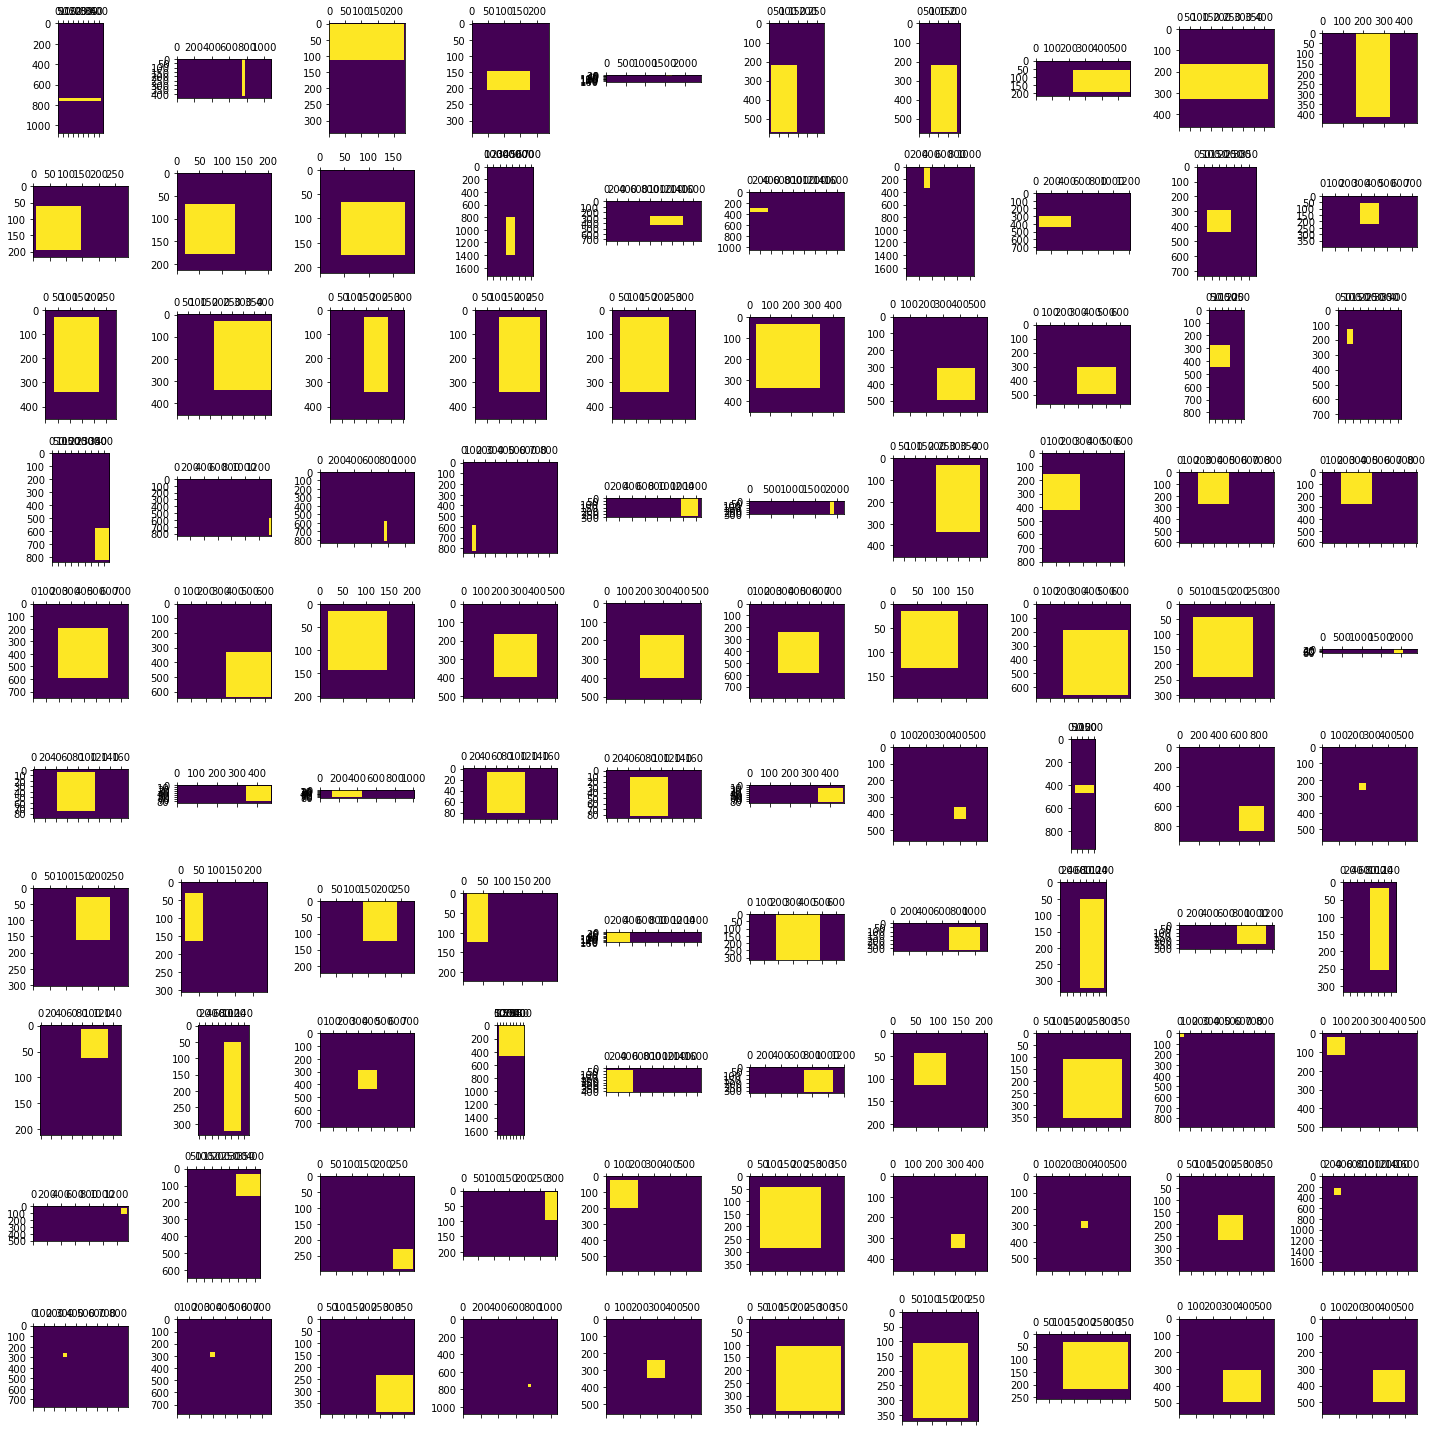

In [63]:
fig, axs = plt.subplots(10,10, figsize=(20, 20))
fig.set_tight_layout(True)
for i, ax in enumerate(axs.flat):
    ax.set_aspect('auto', adjustable='box')
    ax.matshow(masks_domainsOnly['Sites Masks'].iloc[i])
    

In [69]:
masks_domainsOnly.to_pickle('data/masks_singlesite_domains_only.pkl')